In [6]:
import math
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sympy.abc import beta

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Polar Euler-Cromer functions

In [7]:
def rad_f1 (r, thd, k): #R_DD
    f1 = (r*(thd**2))-(k/r**2)
    return f1
def rad_f2 (r, rd, thd): #THETA_DD
    f2 = (-2*rd*thd)/r
    return f2

def rad_orbit (x0, t, h, k):
    r = [x0[0]]
    rd = [x0[1]]
    rdd = []
    th = [0]
    thd = [x0[2]]
    thdd = []
    time = []
    
    count = range(len(t))
    for i in count:
        time.append(t[i])
        foo = rad_f1(r[i], thd[i], k)
        rdd.append(foo)
        foo = rad_f2(r[i], rd[i], thd[i])
        thdd.append(foo)
        if i+1 == len(t):
            break
        if abs(r[i]) >= 1e20 or abs(rd[i]) >= 1e20 or abs(rdd[i]) >= 1e20 or abs(thd[i]) >= 1e20 or abs(thdd[i]) >= 1e20:
            break
        foo = rd[i] + rdd[i]*h
        rd.append(foo)
        foo = r[i] + rd[i]*h
        r.append(foo)
        foo = thd[i] + thdd[i]*h
        thd.append(foo)
        foo = th[i] + thd[i]*h
        th.append(foo)
    return r, rd, rdd, th, thd, thdd, time

# Linear Euler-Cromer functions

In [8]:
def lin_f1 (x, y):
    f1 = -k*x/(x**2+y**2)**(3/2)
    return f1
def lin_f2 (x, y):
    f2 = -k*y/(x**2+y**2)**(3/2)
    return f2

def lin_orbit (x0, t, h, k):
    x = [x0[0]]
    xd = [x0[1]]
    xdd = []
    y = [x0[2]]
    yd = [x0[3]]
    ydd = []
    time = []
    
    count = range(len(t))
    for i in count:
        time.append(t[i])
        foo = lin_f1(x[i], y[i])
        xdd.append(foo)
        foo = lin_f2(x[i], y[i])
        ydd.append(foo)
        if i+1 == len(t):
            break
        if abs(x[i]) >= 1e20 or abs(xd[i]) >= 1e20 or abs(xdd[i]) >= 1e20 or abs(yd[i]) >= 1e20 or abs(ydd[i]) >= 1e20:
            break
        foo = xd[i] + xdd[i]*h
        xd.append(foo)
        foo = x[i] + xd[i]*h
        x.append(foo)
        foo = yd[i] + ydd[i]*h
        yd.append(foo)
        foo = y[i] + yd[i]*h
        y.append(foo)
    return x, xd, xdd, y, yd, ydd, time

# Polar plots

In [9]:
r0 = 1
rd0 = 0
thd0 = 2*np.pi
x0 = [r0, rd0, thd0]
k = float(4*np.pi**2)

In [10]:
h = 0.0001
t = np.arange(0, 5, h)

In [11]:
r, rd, rdd, th, thd, thdd, time = rad_orbit(x0, t, h, k)

(0.0, 1.5)

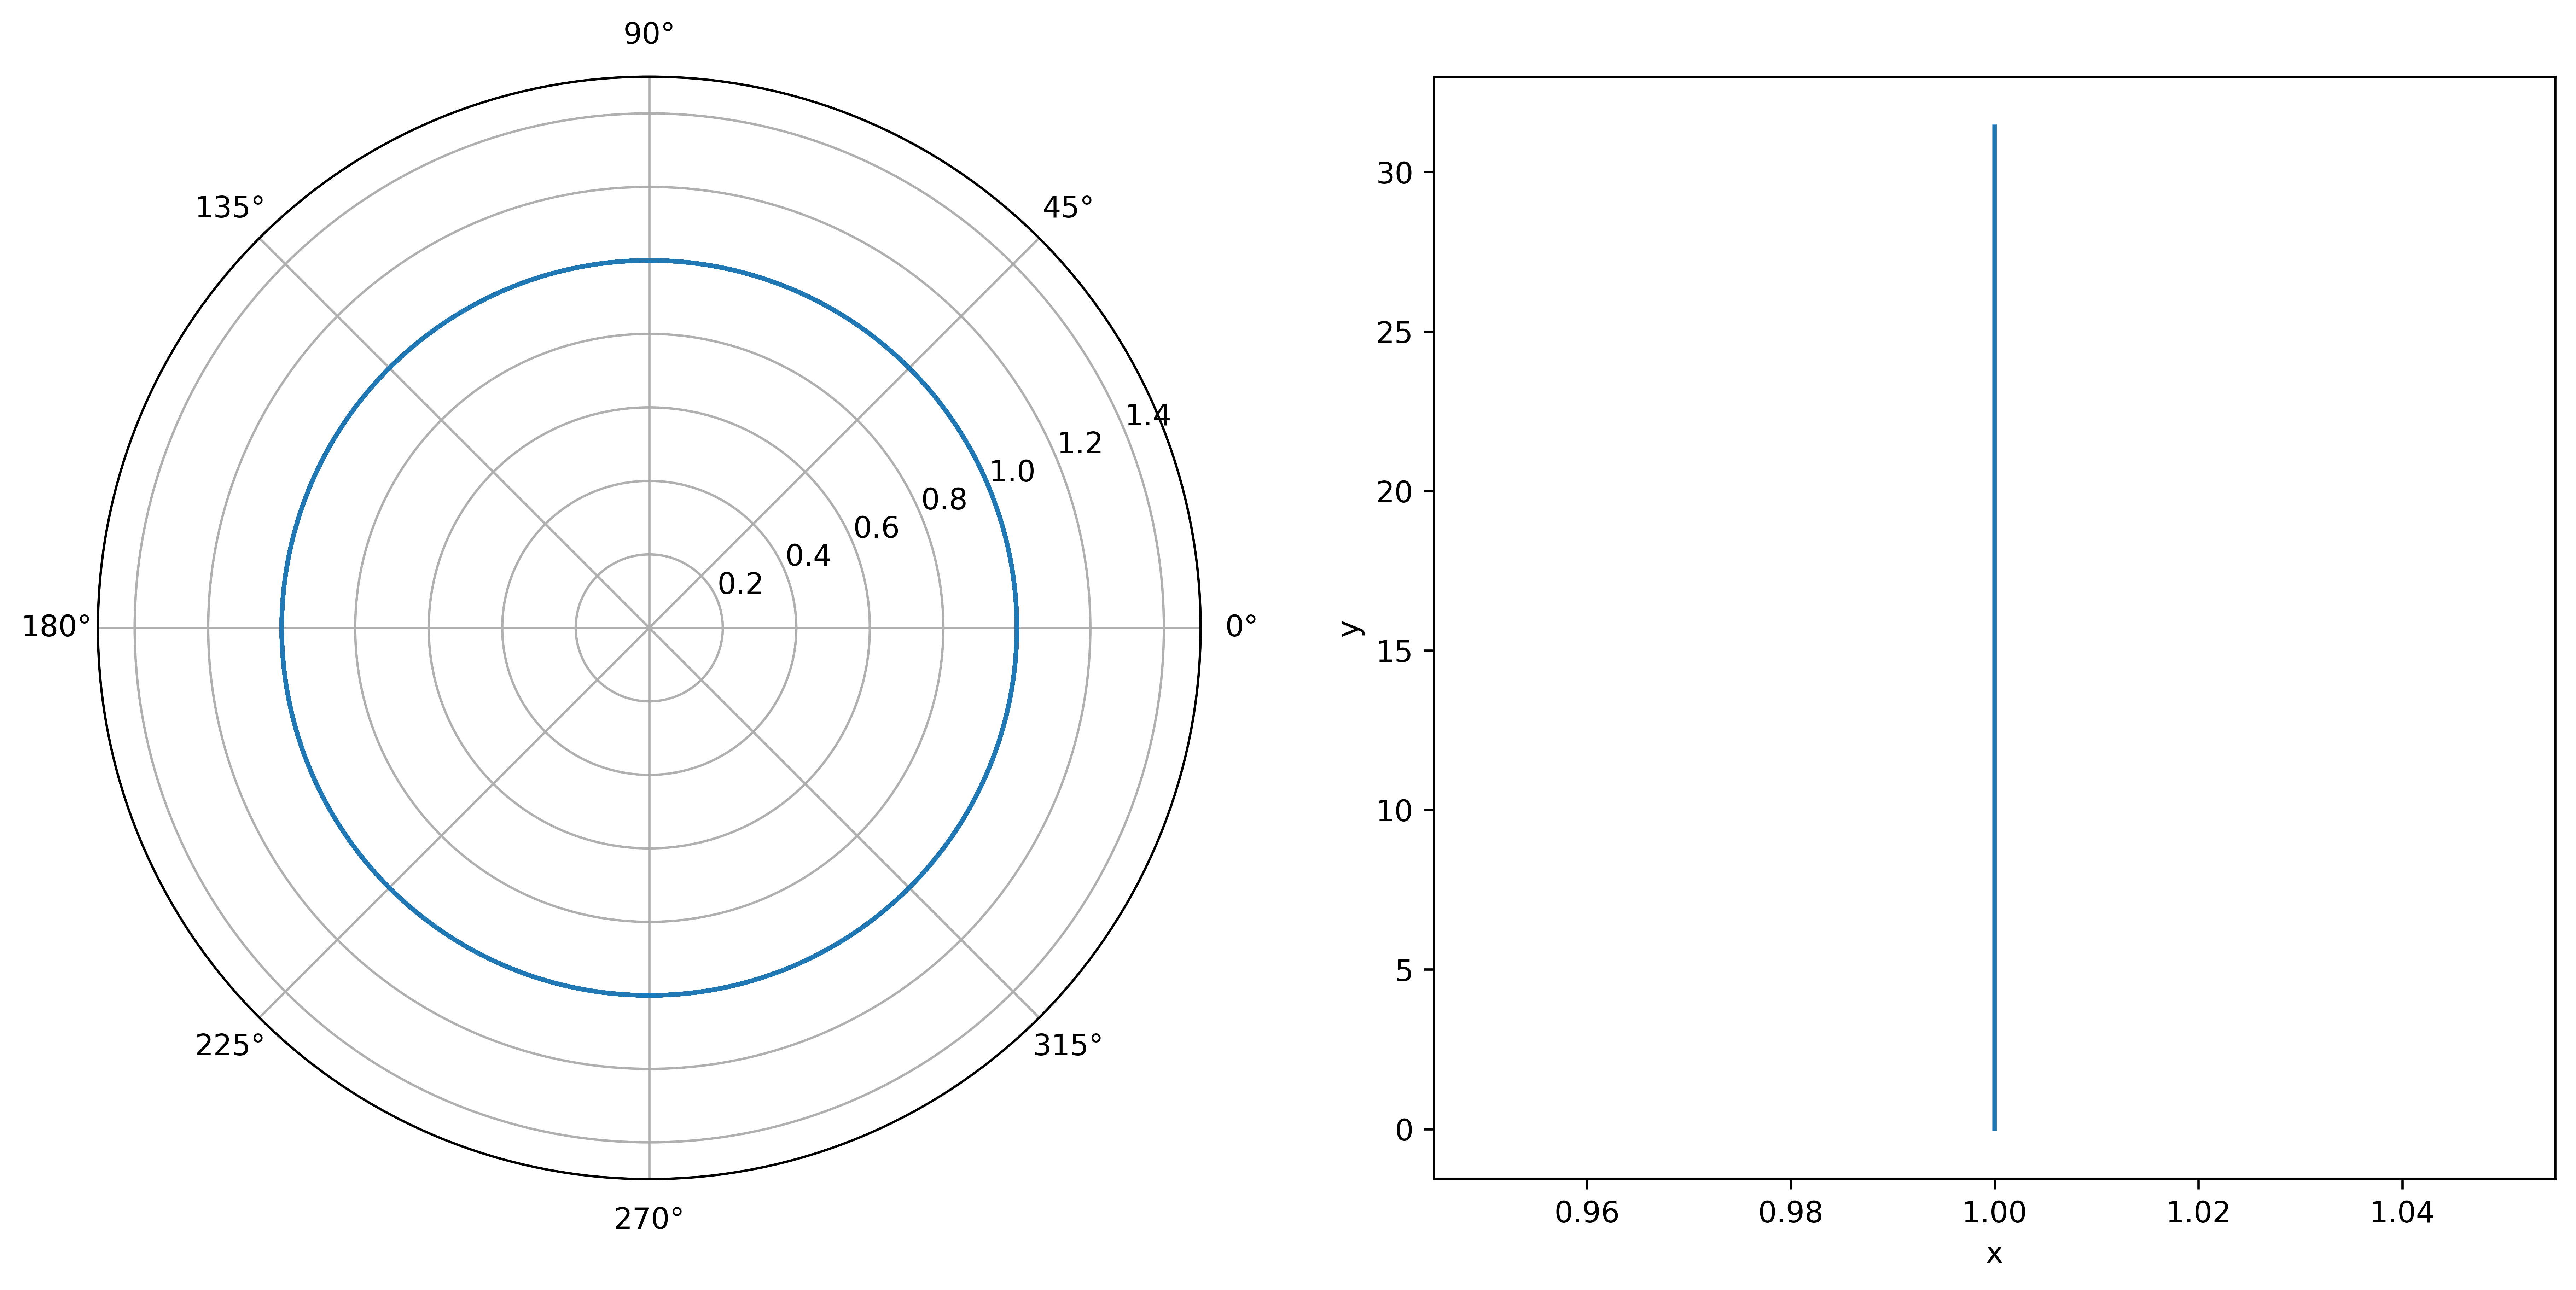

In [12]:
fig = plt.figure(figsize=(15,6.75), dpi=600)
ax0 = fig.add_subplot(1, 2, 1, polar=True)
ax0.set_ylim(0, max(r)*1.5)
ax0.plot(th, r)
ax1 = fig.add_subplot(1, 2, 2, xlabel='x', ylabel='y')
ax1.plot(r, th)

(0.0, 37.5)

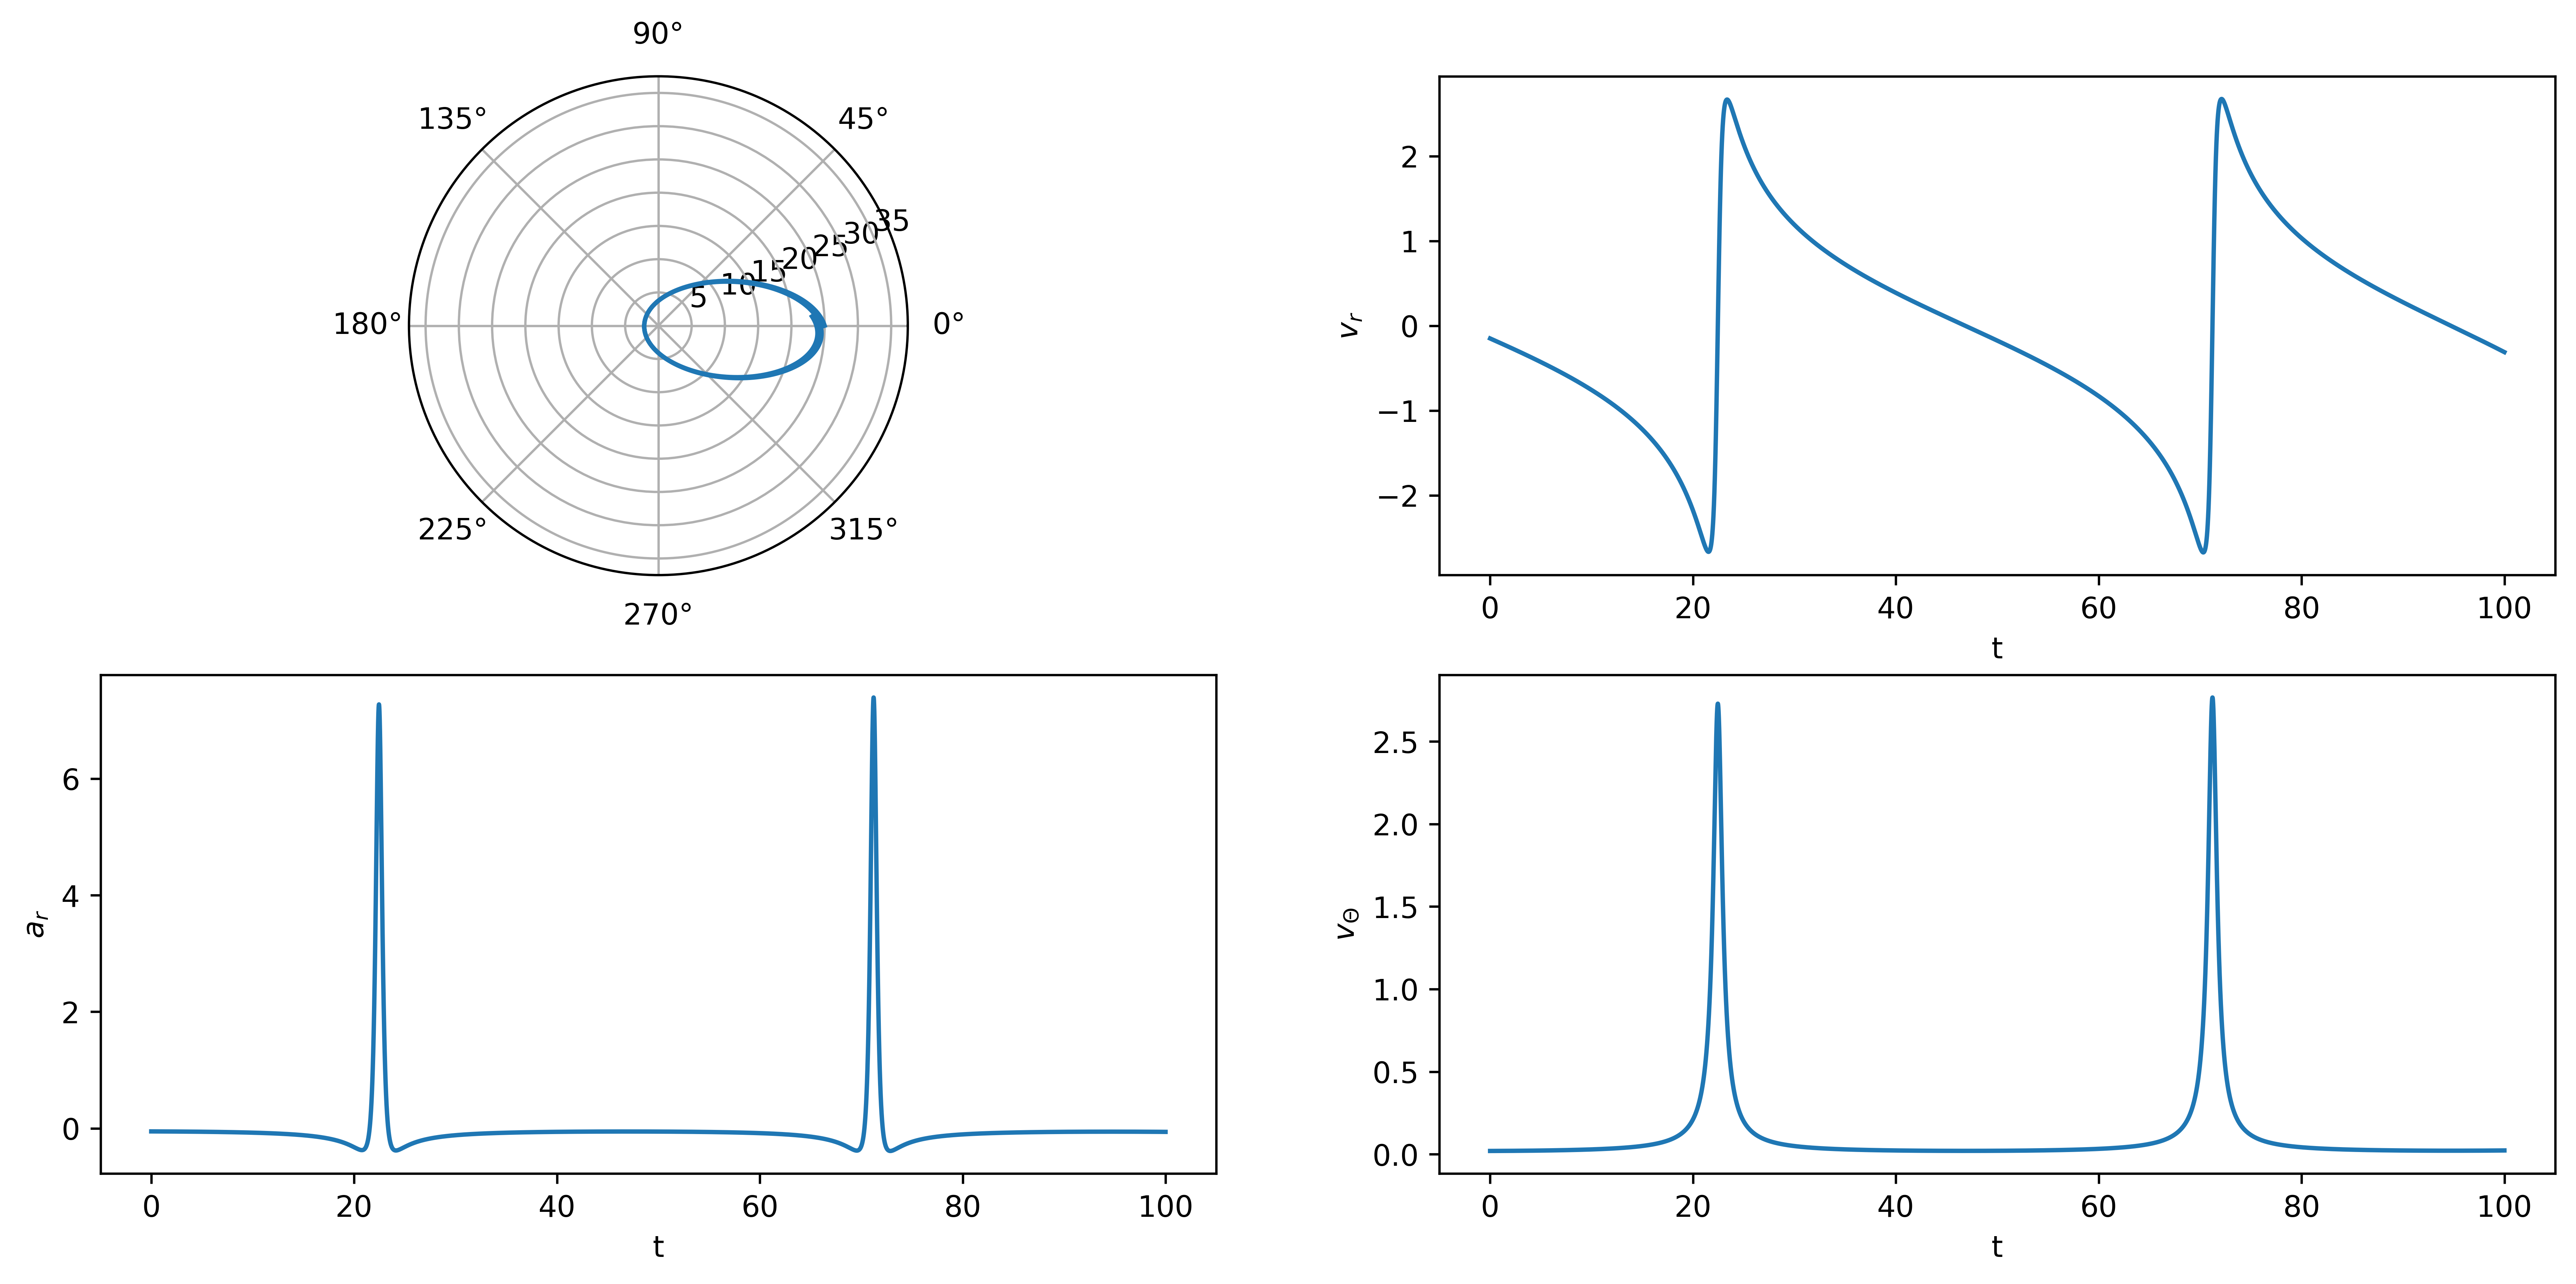

In [13]:
x0 = [25, -.15, .02] #r0, rd0, thd0
k = 4*np.pi**2
h = 0.001
t = np.arange(0, 100, h)
r, rd, rdd, th, thd, thdd, time = rad_orbit(x0, t, h, k)
fig = plt.figure(figsize=(15,6.75), dpi=600)
ax0 = fig.add_subplot(2, 2, 1, polar=True)
ax0.set_ylim(0, max(r)*1.5)
ax0.plot(th, r)
ax1 = fig.add_subplot(2, 2, 2, xlabel='t', ylabel='$v_r$')
ax1.plot(time, rd)
ax2 = fig.add_subplot(2, 2, 3, xlabel='t', ylabel='$a_r$')
ax2.plot(time, rdd)
ax3 = fig.add_subplot(2, 2, 4, xlabel='t', ylabel='$v_\Theta$')
ax3.plot(time, thd)

# Linear plots

(-37.56743358311553, 37.56743358311553)

(-37.56743358311553, 37.56743358311553)

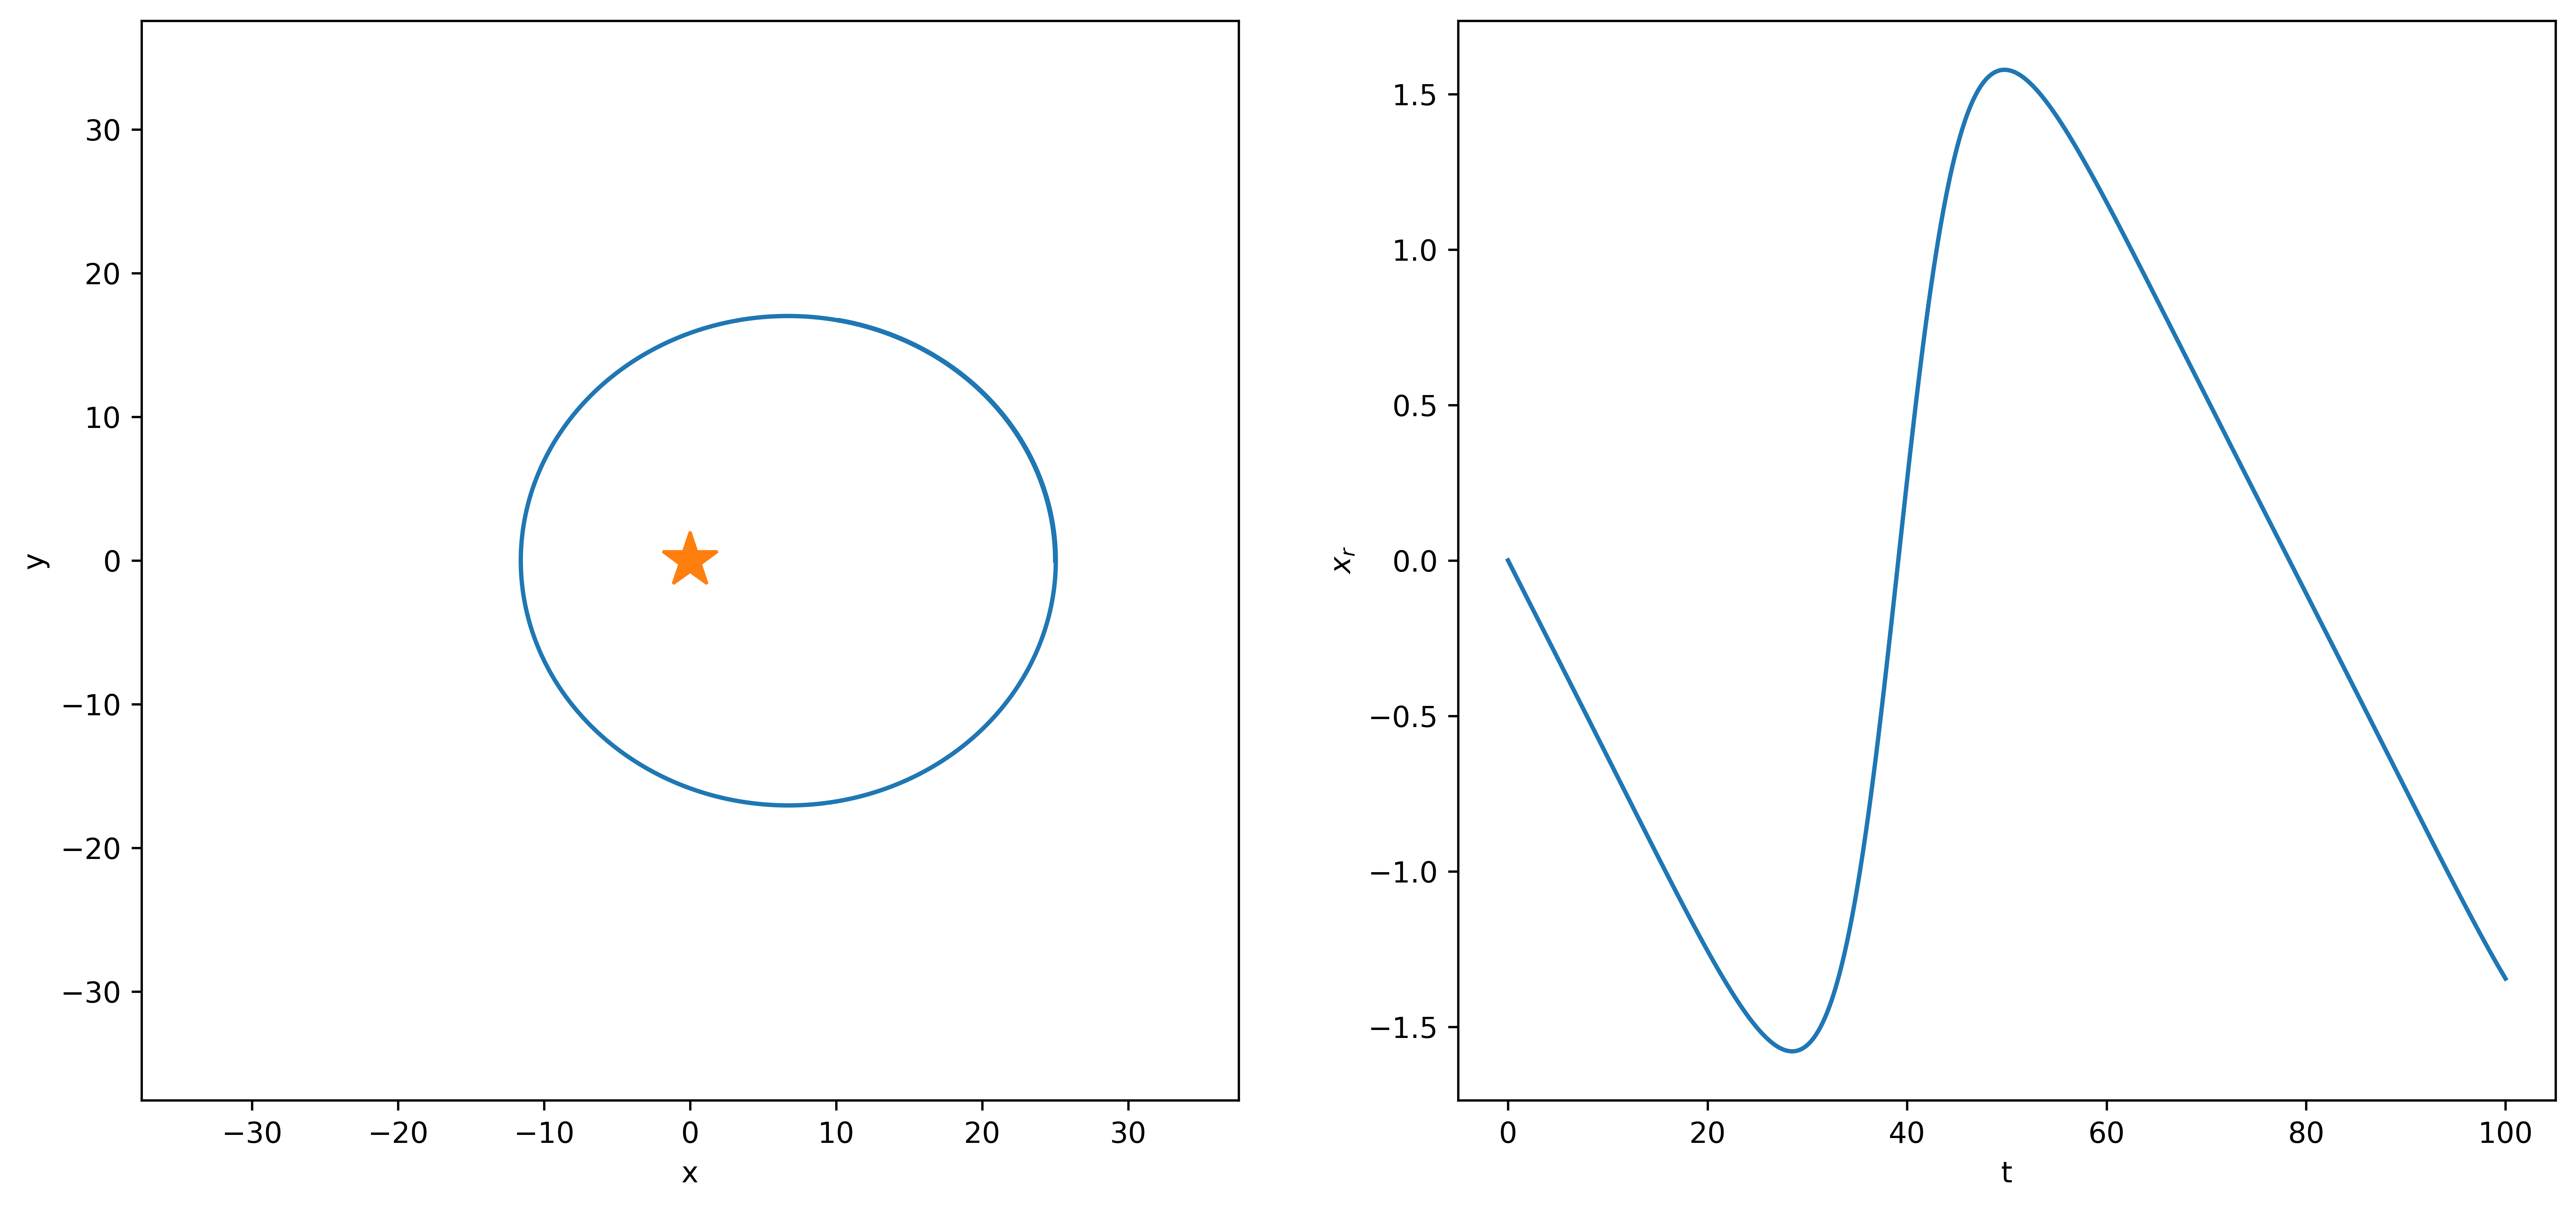

In [14]:
x0 = [25, 0, 0, 1] #x0, xd0, y0, yd0
k = 4*np.pi**2
h = 0.001
t = np.arange(0, 100, h)
x, xd, xdd, y, yd, ydd, time = lin_orbit(x0, t, h, k)
fig = plt.figure(figsize=(15,6.75), dpi=600)
lim = [abs(min(x)), abs(max(x)), abs(min(y)), abs(max(y))]
ax0 = fig.add_subplot(1, 2, 1, xlabel='x', ylabel='y')
ax0.set_xlim(-max(lim)*1.5, max(lim)*1.5)
ax0.set_ylim(-max(lim)*1.5, max(lim)*1.5)
ax0.plot(x, y)
ax0.plot(0, 0, marker='*', markersize=20)
ax1 = fig.add_subplot(1, 2, 2, xlabel='t', ylabel='$x_r$')
ax1.plot(time, xd)
# ax2 = fig.add_subplot(2, 2, 3, xlabel='t', ylabel='$a_r$')
# ax2.plot(time, rdd)
# ax3 = fig.add_subplot(2, 2, 4, xlabel='t', ylabel='$v_r$')
# ax3.plot(time, rd)

(-82.96101462941414, 82.96101462941414)

(-82.96101462941414, 82.96101462941414)

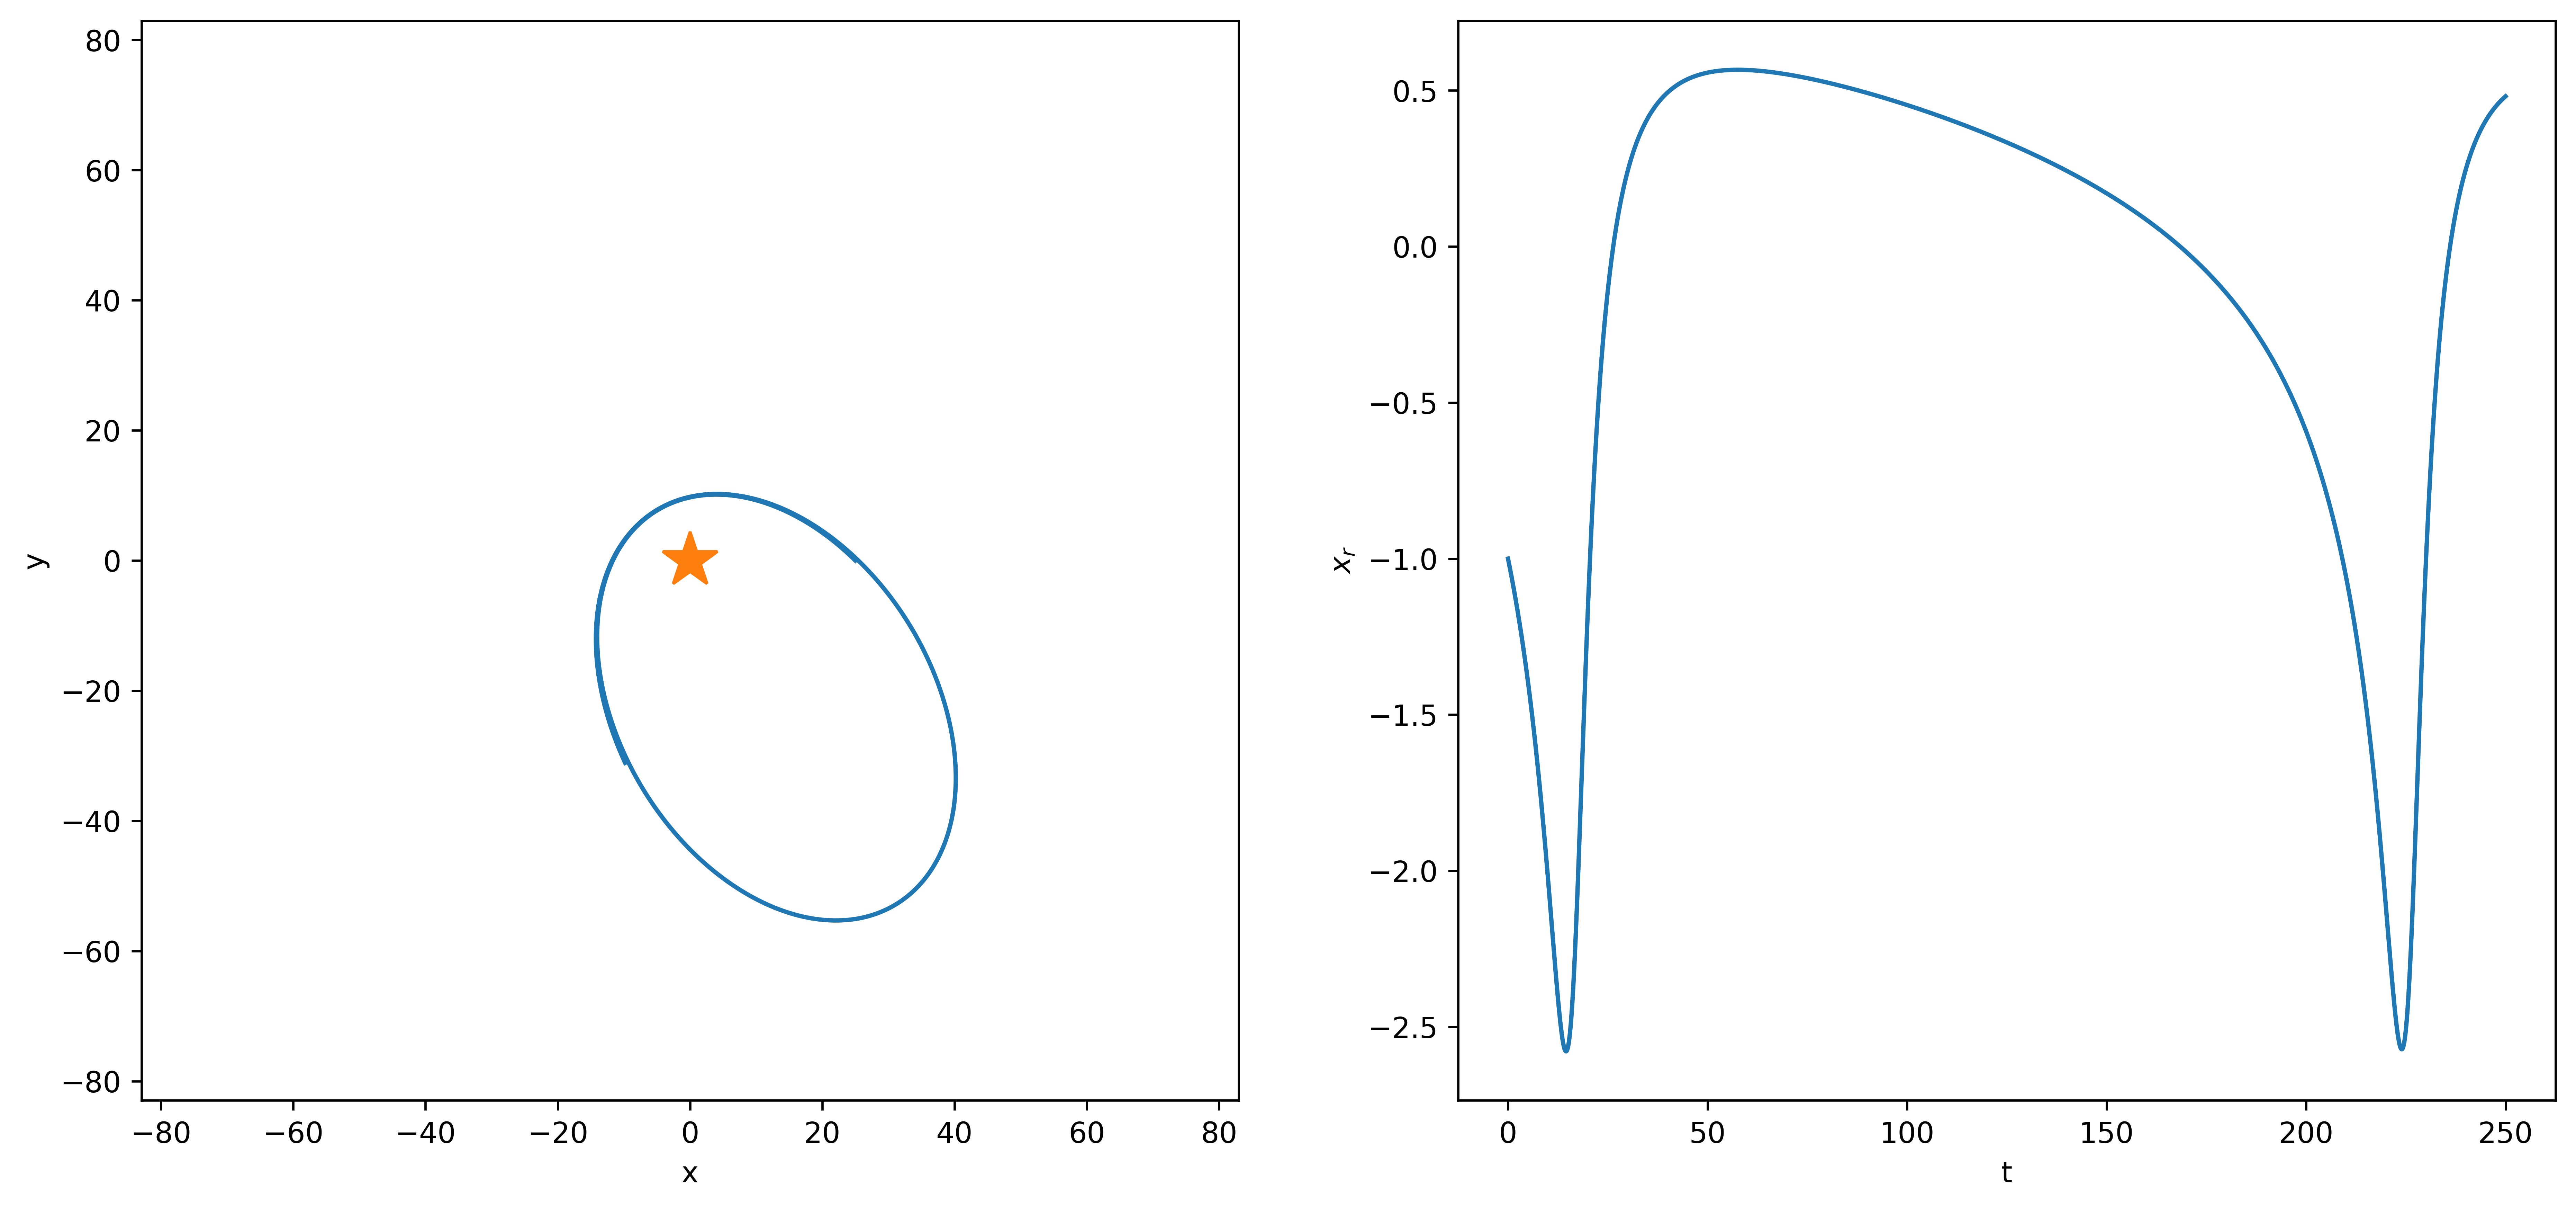

In [15]:
x0 = [25, -1, 0, 1] #x0, xd0, y0, yd0
k = 4*np.pi**2
h = 0.01
t = np.arange(0, 250, h)
x, xd, xdd, y, yd, ydd, time = lin_orbit(x0, t, h, k)
fig = plt.figure(figsize=(15,6.75), dpi=600)
lim = [abs(min(x)), abs(max(x)), abs(min(y)), abs(max(y))]
ax0 = fig.add_subplot(1, 2, 1, xlabel='x', ylabel='y')
ax0.set_xlim(-max(lim)*1.5, max(lim)*1.5)
ax0.set_ylim(-max(lim)*1.5, max(lim)*1.5)
ax0.plot(x, y)
ax0.plot(0, 0, marker='*', markersize=20)
ax1 = fig.add_subplot(1, 2, 2, xlabel='t', ylabel='$x_r$')
ax1.plot(time, xd)

(-65.77826117463086, 65.77826117463086)

(-65.77826117463086, 65.77826117463086)

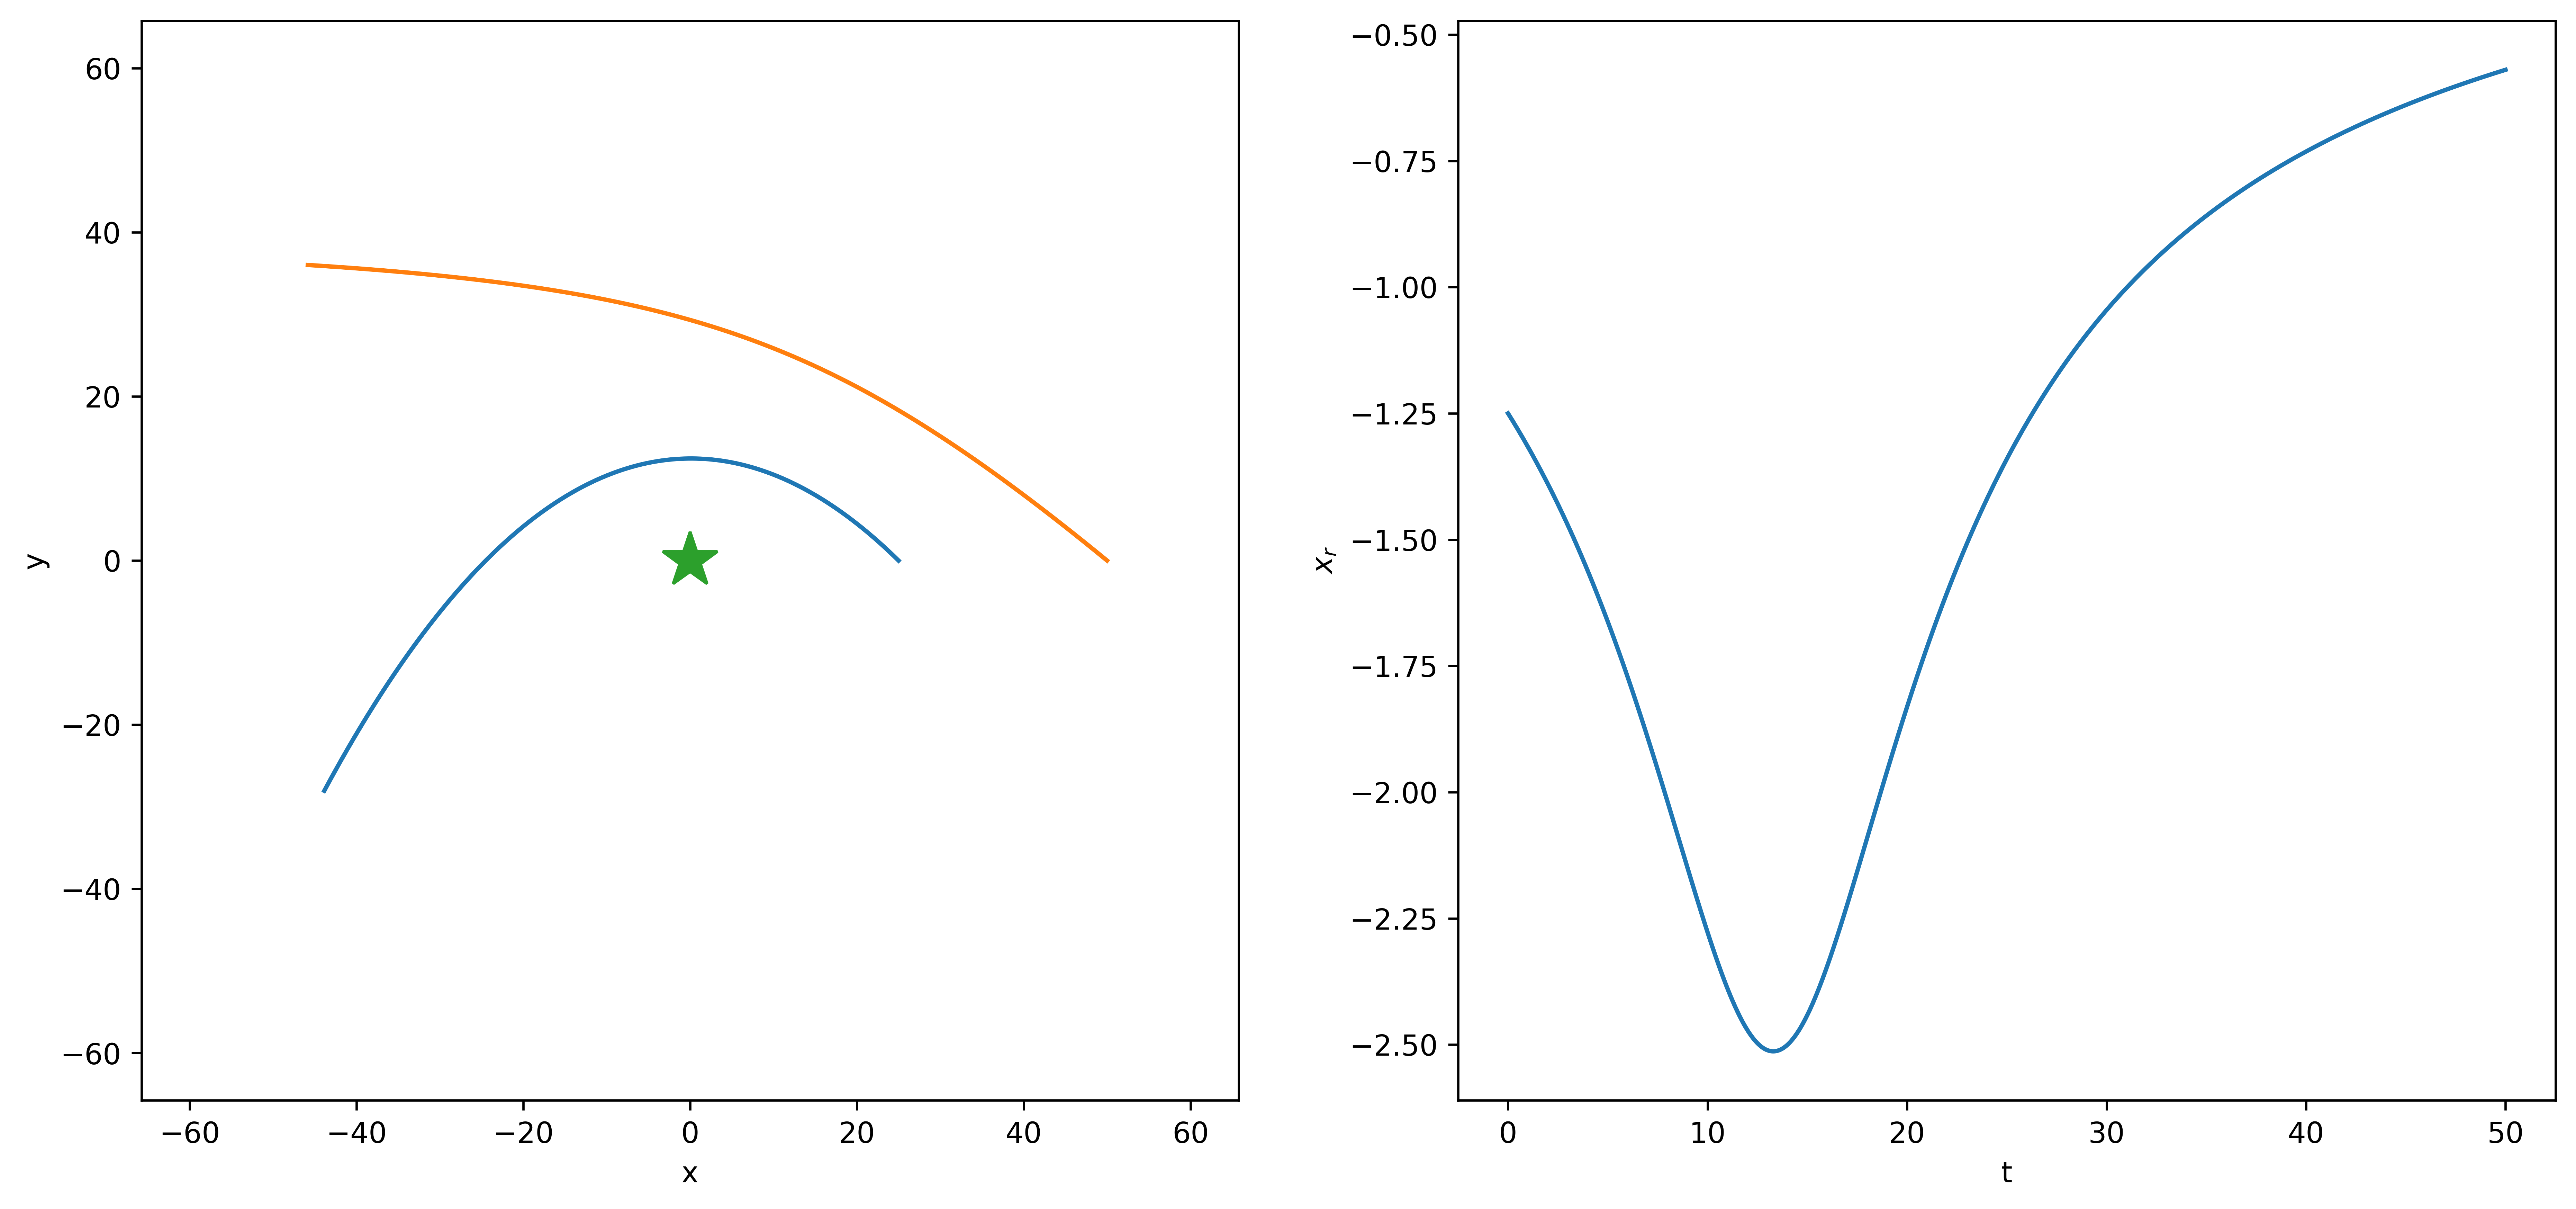

In [16]:
x0 = [25, -1.25, 0, 1.25] #x0, xd0, y0, yd0
k = 4*np.pi**2
h = 0.001
t = np.arange(0, 50, h)
x, xd, xdd, y, yd, ydd, time = lin_orbit(x0, t, h, k)
fig = plt.figure(figsize=(15,6.75), dpi=600)
lim = [abs(min(x)), abs(max(x)), abs(min(y)), abs(max(y))]
ax0 = fig.add_subplot(1, 2, 1, xlabel='x', ylabel='y')
ax0.set_xlim(-max(lim)*1.5, max(lim)*1.5)
ax0.set_ylim(-max(lim)*1.5, max(lim)*1.5)
ax0.plot(x, y)
x0 = [50, -1.5, 0, 1.25] #x0, xd0, y0, yd0
pl1 = lin_orbit(x0, t, h, k)
ax0.plot(pl1[0], pl1[3])
ax0.plot(0, 0, marker='*', markersize=20)
ax1 = fig.add_subplot(1, 2, 2, xlabel='t', ylabel='$x_r$')
ax1.plot(time, xd)

# Explicit Kepler solution

(-2.4999999999550253, 2.4999999999550253)

(-2.4999999999550253, 2.4999999999550253)

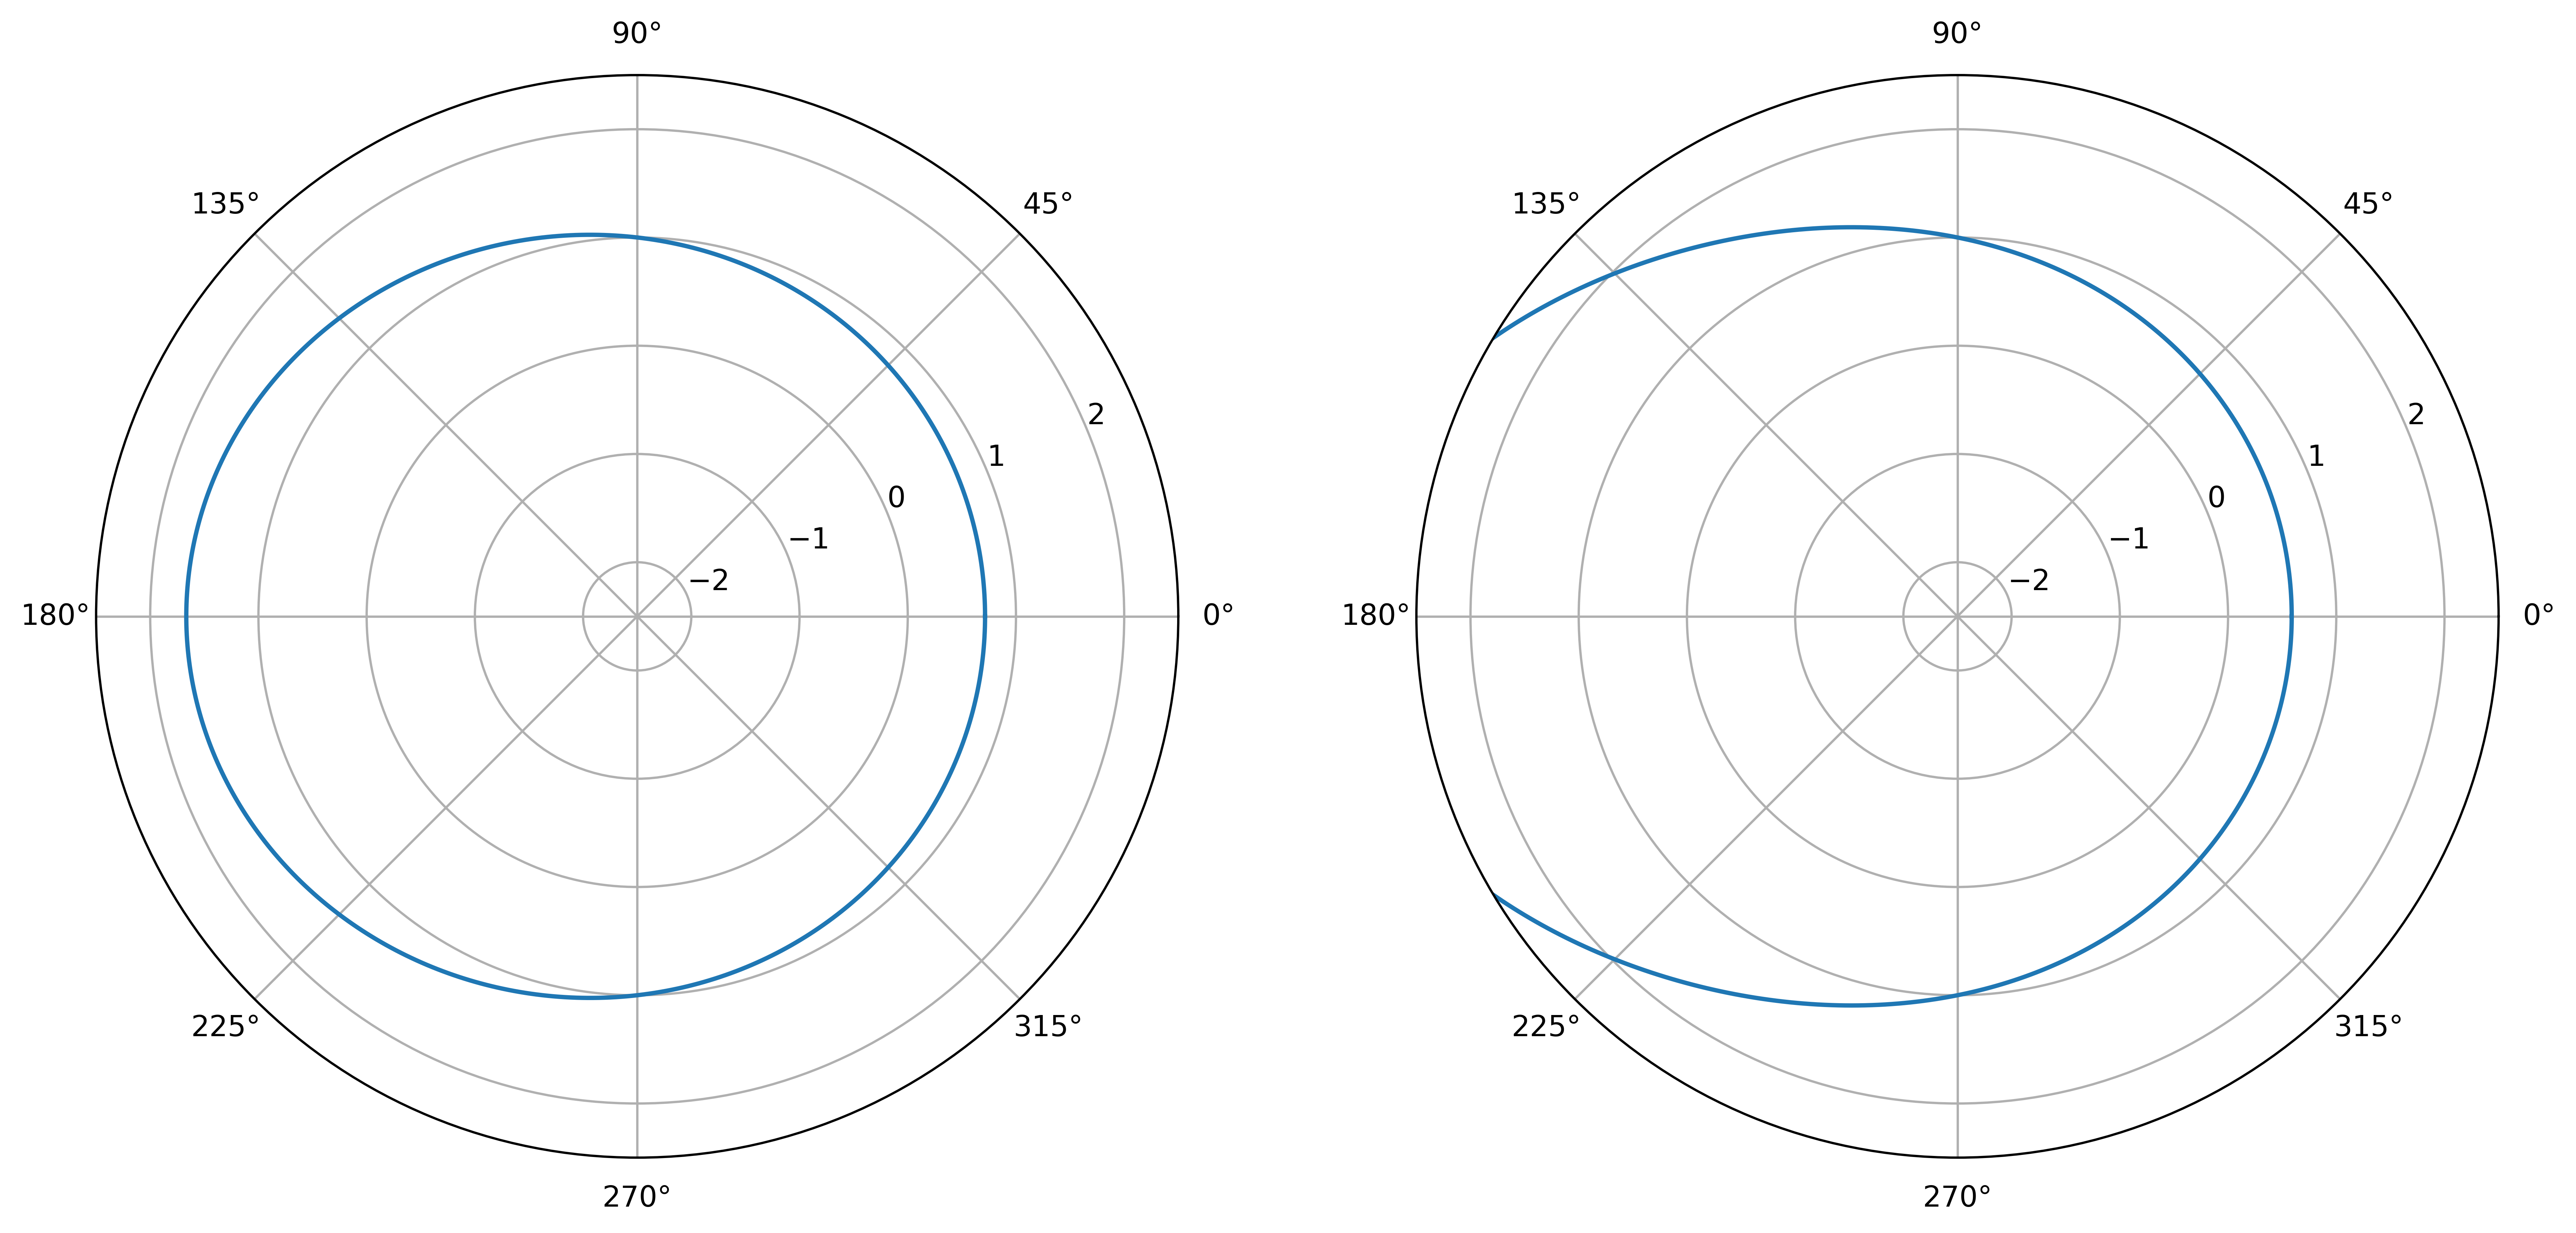

In [5]:
# x0 = [25, 0, 0, 1] #x0, xd0, y0, yd0

h = 0.0001
th = np.arange(0, 2*np.pi, h)

# M = 1
# m = 1
# thd0 = 0.1
e = .4
# phi = 0
# G = 1
# k = G*M*m
# r0 = 1

# mu = M+m/(M*m)
# l = mu*r0**2*thd0

#r = (-k*mu*(1+e*np.cos(th+phi))/l**2)**(-1)
r = (1+e*np.cos(th))**(-1)
e = 0.7
r1 = (1+e*np.cos(th))**(-1)

fig = plt.figure(figsize=(15,6.75), dpi=600)
lim = [abs(min(r)), abs(max(r))]
ax0 = fig.add_subplot(1, 2, 1, polar=True)
ax0.set_ylim(-max(lim)*1.5, max(lim)*1.5)
ax0.plot(th, r)
ax0 = fig.add_subplot(1, 2, 2, polar=True)
ax0.set_ylim(-max(lim)*1.5, max(lim)*1.5)
ax0.plot(th, r1)

\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\
\


